# Introduction

This project includes the analysis of a database of GDP and life expectancy of 6 different countries. It'll try to find answers to a couple different questions, like:
- Is GDP of a country and its life expectancy correlated? How strong is the correlation?
- Which countries have the highest life expectancy? Has it changed over the years?
- Which country experienced the largest growth of life expectancy?
- Could we predict life expectancy based on a chosen country's GDP?

The database can be found here: [link](https://content.codecademy.com/PRO/paths/data-science/Life-Expectancy-and-GDP-Starter.zip?_gl=1*1txg85i*_gcl_au*MTIzMjEwODM5OS4xNzM2MjkyODkw*_ga*NTI2NTQxNDY1LjE3MzA4NTA1MjA.*_ga_3LRZM6TM9L*MTczNzI5ODY1NS4yNi4xLjE3MzczMDAzMTUuMC4wLjA.)

The sources for the data above are:
- World Bank (for the GDP data),
- World Health Organisation (for the life expectancy data).

# I. Setting up the document

Importing all the necessary python libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

Importing our data as DataFrame

In [7]:
database = pd.read_csv('all_data.csv')
database.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# II. Checking the data prior to analysis

## Inspecting our variables' values to check for typos or other simple mistakes.

In [10]:
print('Countries included in the database are: ' + str(database.Country.unique()))
print('Years of measurements: ' + str(database.Year.unique()))

Countries included in the database are: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Years of measurements: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The column name 'Life expectancy at birth (years)' is going to be hard to implement in the code, so it's a good choice to rename it.
Similarly 'United States of America' will for sure cause problems during visualizing the data. Let's change it right away.

In [12]:
database.rename(columns={'Life expectancy at birth (years)': 'LifeExp'}, inplace=True)
database.loc[database['Country'] == 'United States of America', 'Country'] = 'USA'

print('Countries included in the database are: ' + str(database.Country.unique()))
print('Columns of the database are: ' + str(database.columns))

Countries included in the database are: ['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
Columns of the database are: Index(['Country', 'Year', 'LifeExp', 'GDP'], dtype='object')


## Checking the whole database's summary statistics to look for anything out of the ordinary.

In [14]:
database.describe(include='all')

,Country,Year,LifeExp,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


Thanks to this summary we can notice that there are no suspicious values in any column (like i.e. a 0 in life expectancy as a placeholder for missing value). Count of each variable is the same (96 values), which suggests there are no missing data.

It's worth pointing out, that there are countries with extremely varied GDP as the max value is 4 orders of magnitude larger than the lowest. It suggests that the countries might be of an extremely different level of wealth. Nevertheless we don't have their population mentioned in the document so we shouldn't jump to any conclusions.

In [16]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LifeExp  96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


This output confirmes that no data is missing and shows that all the data is of correct data type.

## Checking the distribution of records between countries and years.

In [19]:
print(database.Country.value_counts())
print(database.Year.value_counts())

Country
Chile       16
China       16
Germany     16
Mexico      16
USA         16
Zimbabwe    16
Name: count, dtype: int64
Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64


Each county has the same amount of records evenly distributed one per year, so we can efficiently compare the data.

# III. Comparing the life expectancy data of each country.

## Checking the life expectancy change over the years compared to the GDP growth

Defining a function for showing change in life expectancy and country's GDP.

In [24]:
def plotLifeExGDP(country):
    fig, ax1 = plt.subplots()
    plt.plot(database.Year[database.Country == country], database['LifeExp'][database.Country == country], color = 'orange', label='Life expectancy')
    ax1.set_xticks(database.Year)
    for label in ax1.xaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    ax1.set_ylabel('Life expectancy', color='orange')
    plt.tick_params(axis='x', labelsize = 10, rotation=30)
    ax2 = ax1.twinx()
    ax2.plot(database.Year[database.Country == country], database['GDP'][database.Country == country]/1000000000, color = 'green', linestyle='--', label='GDP')
    ax2.set_ylabel('GPD (in B$)', color='green')
    plt.title(f'{country} - Life expectancy and GDP change') 
    fig.legend(bbox_to_anchor=(.4, .9))
    plt.tight_layout()
    fig.savefig(f'LifeExGDP_{country}')
    plt.show()
    plt.close()

Displaying all the line plots for each country.

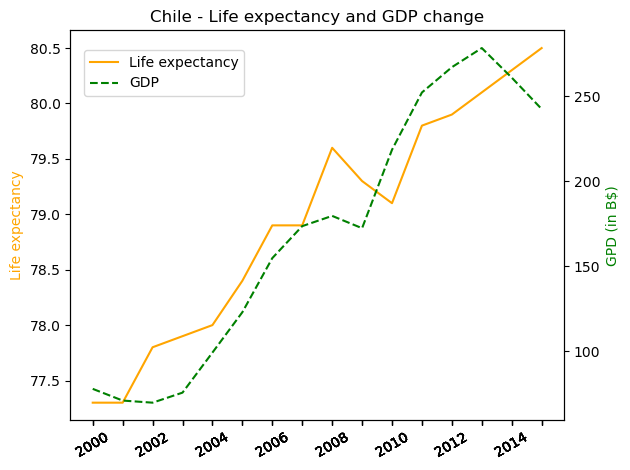

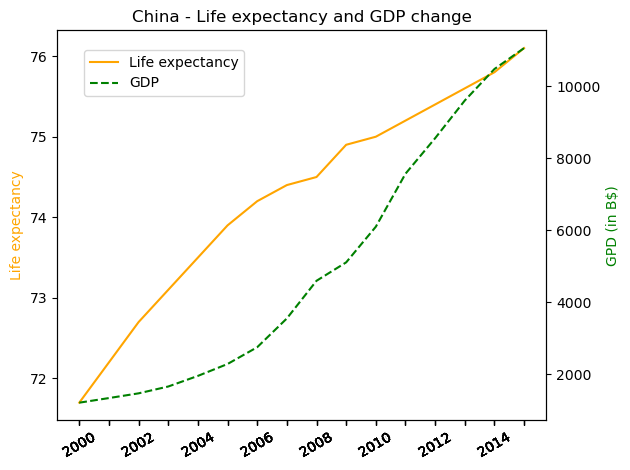

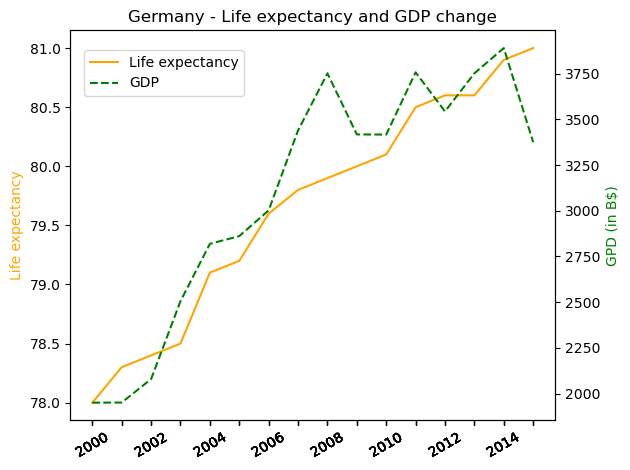

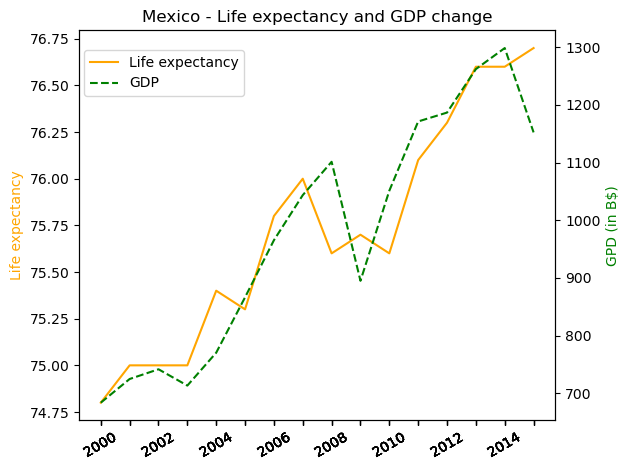

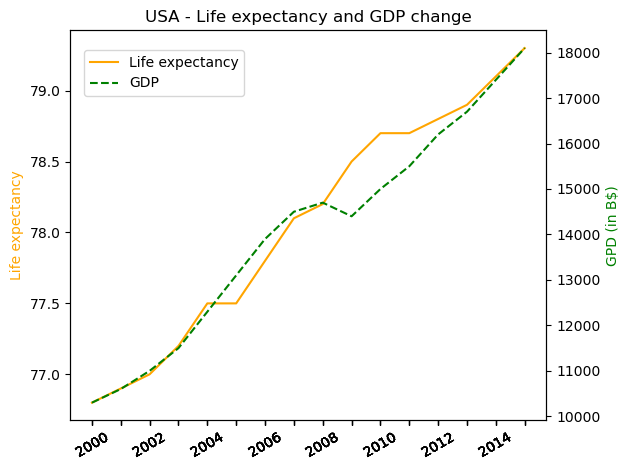

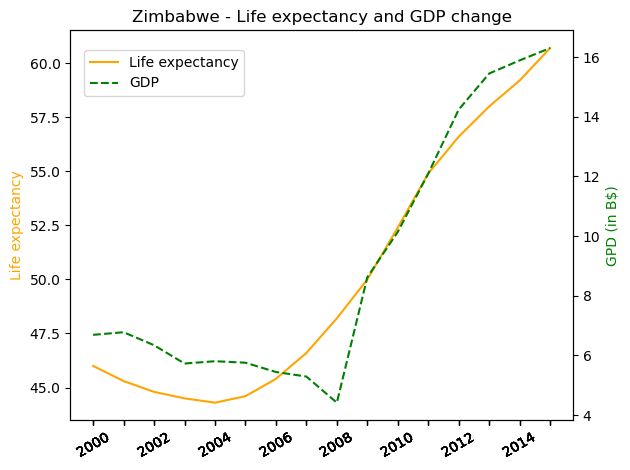

In [26]:
for country in database.Country.unique():
    plotLifeExGDP(country)


When inspecting the graphs we can clearly see the strong correlation between GDP and Life Expectancy growth.
An interesting outlier is the plot of China. Here the life expectancy experienced a major growth with the GDP growth staying quite significantly behind.

**Checking the relationship of these two variables.**

The two numerical variables' relationship could be measured using covariance and correlation. Covariance score is dependant on the scale of given numbers, so it would be hard to use it to compare countries with vastly different GDP. I'm gonna use correlation between GDP and Life Expectancy as it isn't swayed by the scale of numbers.

In [29]:
def corrLifeExGDP(country):
    corr_x_y, p = pearsonr(database['LifeExp'][database.Country == country], database['GDP'][database.Country == country])
    return corr_x_y

In [30]:
countries = database.Country.unique()
correlations = []
for country in database.Country.unique():
    correlations.append(corrLifeExGDP(country))

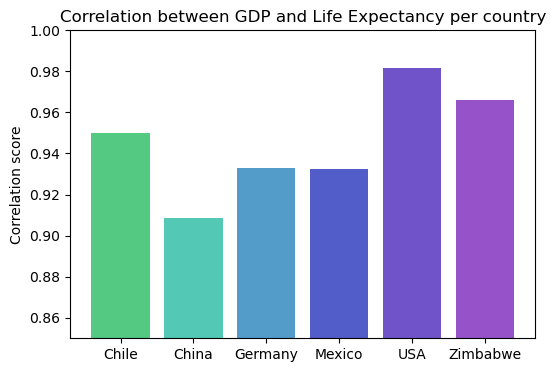

In [31]:
plt.figure(figsize=(6,4))
ax = plt.subplot()
plt.bar(range(len(countries)), correlations, color=['#53c982', '#53c9b5', '#539cc9', '#535dc9', '#7053c9', '#9653c9'])
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
plt.ylim((.85, 1))
plt.ylabel('Correlation score')
plt.title('Correlation between GDP and Life Expectancy per country')
plt.savefig('LifeExGDP_Correlation')
plt.show()
plt.close()

The observation about China's graph is confirmed here. The country's correlation is the lowest out of our database. The highest score of correlation belongs to the USA, which lines on the plot were even overlapping quite often.

## Checking the change in life expectancy for each country over the measured period.

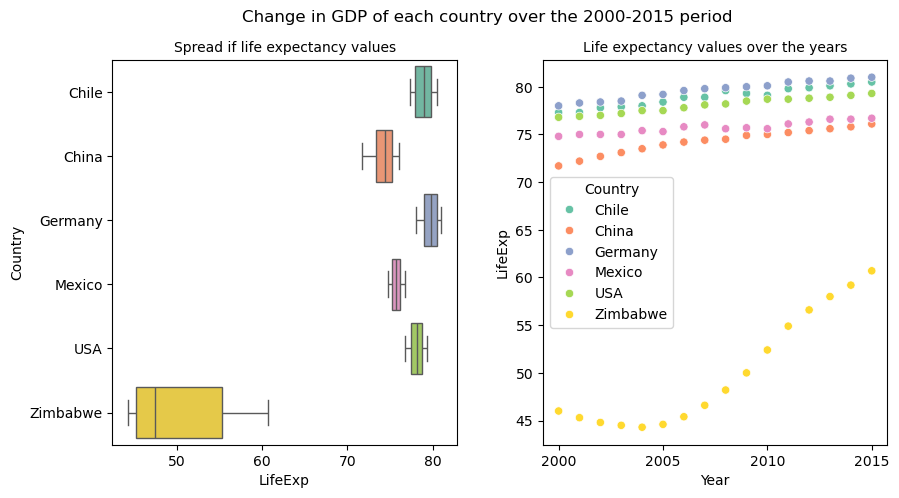

In [34]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(x=database['LifeExp'], y=database.Country, hue=database.Country, palette='Set2')
plt.title('Spread if life expectancy values', size = 10)
ax = plt.subplot(1,2,2)
sns.scatterplot(x='Year', y='LifeExp', data=database, hue='Country', palette='Set2')
plt.title('Life expectancy values over the years', size = 10)
ax.set_xticks([2000, 2005, 2010, 2015])

plt.suptitle('Change in GDP of each country over the 2000-2015 period')
plt.subplots_adjust(wspace=.25)
plt.show()
plt.close()

The previous set of plots proved that life expectancy for all the countries has mostly grown over the considered period only with small drops. The graphs above additionaly shows how significant were the changes when compared to each other.

The unquestionably highest increase in life expectancy was experienced in Zimbabwe. The box plot shows that the lowest record is below 45 years and the highest last one - over 60 years. Moreover, a majority of the growth occured in the later years. That's a difference of over 15 years, while the second biggest growth happened in China, measured at only about 5 years.

An another interesting observation based on the scatter plot is that the ranking of countries for any given year hasn't changed. Germany always had the highest life expectancy, while Zimbabwe stayed on the bottom despite it's impressive growth.

The specific values could be tracked more easily on a pivot table.

In [36]:
lifeExpectancy_nonpivot = database.groupby(['Year', 'Country'])['LifeExp'].max().reset_index()
#print(lifeExpectancy_nonpivot)

In [87]:
lifeExpectancy_pivot = lifeExpectancy_nonpivot.pivot(columns = 'Year', index = 'Country', values = 'LifeExp').reset_index()
print(lifeExpectancy_pivot)

Year   Country  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
0        Chile  77.3  77.3  77.8  77.9  78.0  78.4  78.9  78.9  79.6  79.3   
1        China  71.7  72.2  72.7  73.1  73.5  73.9  74.2  74.4  74.5  74.9   
2      Germany  78.0  78.3  78.4  78.5  79.1  79.2  79.6  79.8  79.9  80.0   
3       Mexico  74.8  75.0  75.0  75.0  75.4  75.3  75.8  76.0  75.6  75.7   
4          USA  76.8  76.9  77.0  77.2  77.5  77.5  77.8  78.1  78.2  78.5   
5     Zimbabwe  46.0  45.3  44.8  44.5  44.3  44.6  45.4  46.6  48.2  50.0   

Year  2010  2011  2012  2013  2014  2015  
0     79.1  79.8  79.9  80.1  80.3  80.5  
1     75.0  75.2  75.4  75.6  75.8  76.1  
2     80.1  80.5  80.6  80.6  80.9  81.0  
3     75.6  76.1  76.3  76.6  76.6  76.7  
4     78.7  78.7  78.8  78.9  79.1  79.3  
5     52.4  54.9  56.6  58.0  59.2  60.7  


# IV. Predicting life expectancy for the USA

## Preparing predictive model

Having found out that correlation between GDP and life expectancy changes is the strongest for the USA, we're going to use it to conduct predictive analysis on that topic.

In [41]:
dataUSA = database[database.Country == 'USA'].reset_index(drop=True)
dataUSA.GDP = dataUSA.GDP/1000000000000
print(dataUSA)

   Country  Year  LifeExp   GDP
0      USA  2000     76.8  10.3
1      USA  2001     76.9  10.6
2      USA  2002     77.0  11.0
3      USA  2003     77.2  11.5
4      USA  2004     77.5  12.3
5      USA  2005     77.5  13.1
6      USA  2006     77.8  13.9
7      USA  2007     78.1  14.5
8      USA  2008     78.2  14.7
9      USA  2009     78.5  14.4
10     USA  2010     78.7  15.0
11     USA  2011     78.7  15.5
12     USA  2012     78.8  16.2
13     USA  2013     78.9  16.7
14     USA  2014     79.1  17.4
15     USA  2015     79.3  18.1


The X axis values are GDP records and Y axis - Life expectancy.

This can be visualized on a scatter plot.

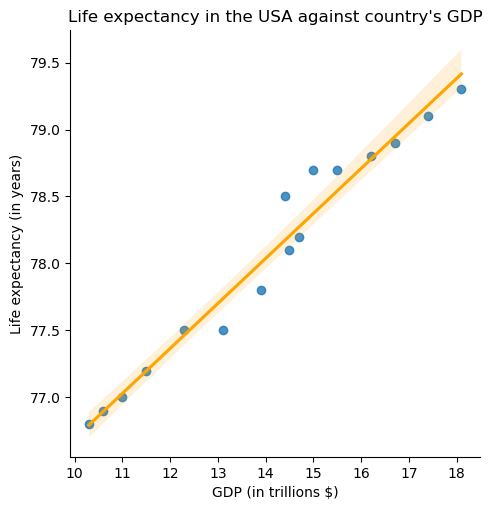

In [43]:
sns.lmplot(x = 'GDP', y ='LifeExp', data=dataUSA, fit_reg=True, line_kws={'color': 'orange'})
plt.title('Life expectancy in the USA against country\'s GDP')
plt.xlabel('GDP (in trillions $)')
plt.ylabel('Life expectancy (in years)')
plt.show()
plt.close()

As illustrated by the regression line, the two variables show a strong linear correlation.

An Ordinary Lowest Square model will be usefull for predicting values in the future.

In [45]:
model = sm.OLS.from_formula('LifeExp ~ GDP', data=dataUSA).fit()
print(model.params)

Intercept    73.333573
GDP           0.335981
dtype: float64


Based on the model the line equation for this set of data is:

(while using GDP numbers in $T)

$$y \approx 0.34*x + 73.33$$


## Checking the validity of the model

Additional columns in the dataframe will store fitted values obtained from the model and residuals of our predictions.

In [49]:
dataUSA['FittedValues'] = round(model.predict(dataUSA), 2)
dataUSA['Residuals'] = dataUSA.LifeExp - dataUSA.FittedValues
dataUSA.head(20)

,Country,Year,LifeExp,GDP,FittedValues,Residuals
0,USA,2000,76.8,10.3,76.79,0.01
1,USA,2001,76.9,10.6,76.89,0.01
2,USA,2002,77.0,11.0,77.03,-0.03
3,USA,2003,77.2,11.5,77.20,0.00
4,USA,2004,77.5,12.3,77.47,0.03
5,USA,2005,77.5,13.1,77.73,-0.23
6,USA,2006,77.8,13.9,78.00,-0.20
7,USA,2007,78.1,14.5,78.21,-0.11
8,USA,2008,78.2,14.7,78.27,-0.07
9,USA,2009,78.5,14.4,78.17,0.33


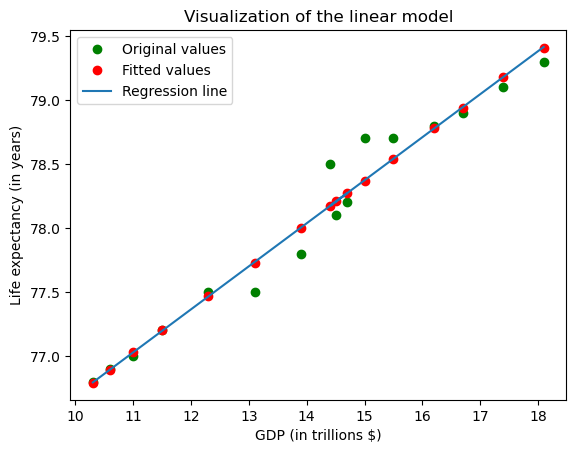

In [50]:
plt.plot(dataUSA.GDP, dataUSA.LifeExp, 'o', color='green', label='Original values')
plt.plot(dataUSA.GDP, dataUSA.FittedValues, 'o', color='red', label='Fitted values')
plt.plot(dataUSA.GDP, dataUSA.GDP*0.335981 + 73.333573, label='Regression line')
plt.title('Visualization of the linear model')
plt.xlabel('GDP (in trillions $)')
plt.ylabel('Life expectancy (in years)')
plt.legend()
plt.show()
plt.close()

**To successfully use linear regression model our data must meet 3 assumptions:**
1. Linear relationship of predictor and outcome variable.
2. Normality of the residuals' distribution.
3. Homoscedasticity - equal variation of residuals across the vales of predictor.

The first condition is met. Graph belows checks the 2nd.

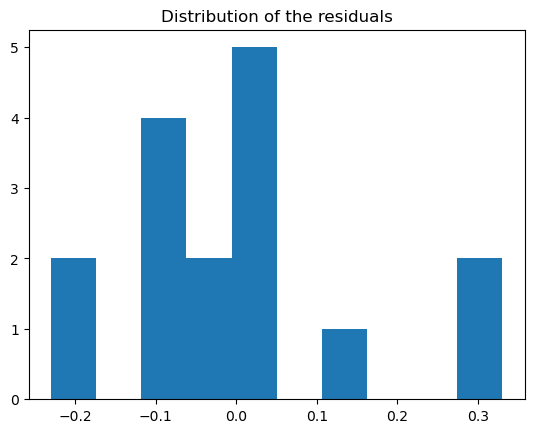

In [52]:
plt.hist(dataUSA.Residuals)
plt.title('Distribution of the residuals')
plt.show()
plt.close()

The low number of datapoints creates an incomplete plot. It is possible to see a start of a forming normal distribution, but it's a stretch.

3rd condition can be checked on the graph below.

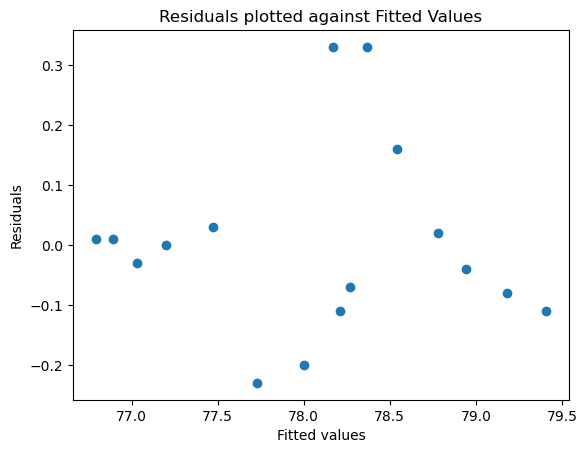

In [54]:
plt.scatter(dataUSA.FittedValues, dataUSA.Residuals)
plt.title('Residuals plotted against Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
plt.close()

The graph shows, that residuals tend to be more significant near the middle of fitted values' range, which is a further reason to be careful while using the model.

## Predicting life expectancy for given GDP numbers

The USA could realistically reach 19T dollars and 20T dollars in the following years. The model can make a prediction about country's life expectancy when it happens.

In [58]:
prediction={'GDP':[19, 20], 'LifeExp': [0, 0]}
prediction=pd.DataFrame(prediction)

prediction.LifeExp = model.predict(prediction)
print(prediction)

   GDP    LifeExp
0   19  79.717205
1   20  80.053185


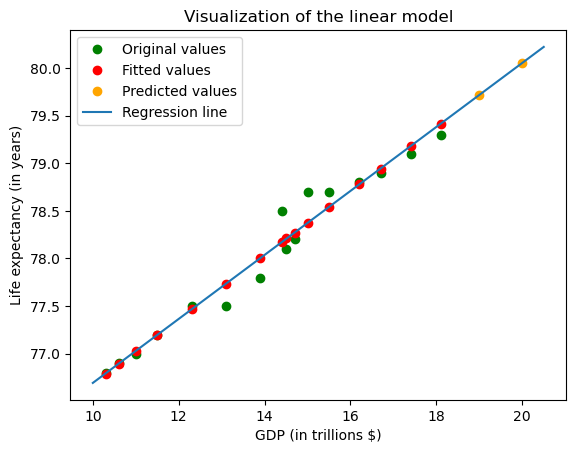

In [59]:
plt.plot(dataUSA.GDP, dataUSA.LifeExp, 'o', color='green', label='Original values')
plt.plot(dataUSA.GDP, dataUSA.FittedValues, 'o', color='red', label='Fitted values')
plt.plot(prediction.GDP, prediction.LifeExp, 'o', color='orange', label='Predicted values')
x = np.linspace(10, 20.5, 10)
plt.plot(x, x*0.335981 + 73.333573, label='Regression line')
plt.title('Visualization of the linear model')
plt.xlabel('GDP (in trillions $)')
plt.ylabel('Life expectancy (in years)')
plt.legend()
plt.show()
plt.close()

As proven before, we can't use this model with certainty, that we'll get perfectly correct outcomes. Our testing has shown that it might be susceptible to biases. Furthermore, it would be risky to use it on numbers greatly larger than those present in the database. We technically could test the model with inputting 200 trillions dollars of the USA's GDP, but we cannot expect that the life expectancy score of about 140 years will be accurate. 

# Summary

Analysis of the given database has enabled us to make a few important observations.
- Country's GDP and Life Expectancy are very closely correlated. The linear correlation score for each country exceeded 0.9, which proves it's a strong relationship.
- All the countries experience an overall growth in Life Expectancy, but Germany securely holds the first place in the ranking.
- Zimbabwe, being the only developing country in the database, experienced the highest growth in life expectancy over the 2000-2015 period. Their result increased by over 30% compared to single-digit percentage changes in all the other countries.
- Considering how strong the linear relationship of the GDP and Life Expectancy is, we can create prediction models based on this data. We should use it carefully, as the database doesn't have big enough samplesize to confidently confirm it's accuracy. 